# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
codebook_path = 'SDOH_2017_Codebook_County.xlsx'
codebook = pd.read_excel(codebook_path, sheet_name='County')

codebook.head()

,Domain,SDOH Topic,Variable Name,Variable Label,Data Source,Type of Data (Numeric or Character),SAS Length,SAS Character,Position on the file
0,Identifier,NaN,YEAR,SDOH file year,NaN,num,4,4.,1
1,6. Geography,NaN,COUNTYFIPS,State-county FIPS Code (5-digit),NaN,char,5,$5.,2
2,6. Geography,NaN,STATEFIPS,State FIPS Code (2-digit),NaN,char,2,$2.,3
3,6. Geography,NaN,STATE,State name,NaN,char,25,$25.,4
4,6. Geography,NaN,COUNTY,County name,NaN,char,75,$75.,5


    Domain: The broad category or area of interest the variable pertains to.
    SDOH Topic: Specific topic within the social determinants of health, if applicable.
    Variable Name: The column name used in the dataset.
    Variable Label: A more descriptive label of what the variable represents.
    Data Source: Source of the data.
    Type of Data (Numeric or Character): Indicates whether the variable is numeric or character.
    SAS Length: The length of the field in the original SAS dataset.
    SAS Character: SAS format if character data.
    Position on the file: The column's position in the dataset.

In [3]:
data_path = 'SDOH_2017.csv'
sdoh_2017 = pd.read_csv(data_path)

# Display the first few rows of the dataset to get an overview
sdoh_2017.head()

,YEAR,COUNTYFIPS,STATEFIPS,STATE,COUNTY,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,...,POS_TOT_HOSP_AMBULANCE,POS_HOSP_AMBULANCE_RATE,POS_TOT_HOSP_CHEMO,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV,CEN_AIAN_NH_IND
0,2017,1001,1,Alabama,Autauga County,South,0,55036.0,54293.0,51898.0,...,0.0,0.00,0.0,0.00,1.0,0.02,50.00,38.89,11.11,0.0
1,2017,1003,1,Alabama,Baldwin County,South,0,203360.0,201089.0,191854.0,...,0.0,0.00,0.0,0.00,3.0,0.01,63.49,36.51,0.00,0.0
2,2017,1005,1,Alabama,Barbour County,South,0,26201.0,25925.0,24765.0,...,0.0,0.00,0.0,0.00,1.0,0.04,73.33,20.00,6.67,0.0
3,2017,1007,1,Alabama,Bibb County,South,0,22580.0,22224.0,21301.0,...,1.0,0.04,1.0,0.04,1.0,0.04,27.27,45.45,27.27,0.0
4,2017,1009,1,Alabama,Blount County,South,0,57667.0,57088.0,54171.0,...,0.0,0.00,0.0,0.00,1.0,0.02,60.00,40.00,0.00,0.0


In [4]:
# Calculate the percentage of missing values for each column
missing_values = sdoh_2017.isnull().mean() * 100

# Display the columns with missing data
missing_values_df = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_df

CAF_ADJ_COUNTY_14    99.969059
CAF_ADJ_COUNTY_12    99.938119
CAF_ADJ_COUNTY_13    99.938119
CAF_ADJ_COUNTY_11    99.876238
CAF_ADJ_COUNTY_10    99.535891
                       ...    
POS_TOT_NF            0.061881
POS_NF_RATE           0.061881
POS_TOT_NF_BEDS       0.061881
POS_NF_BEDS_RATE      0.061881
HRSA_MUA_COUNTY       0.061881
Length: 961, dtype: float64

    Columns like CAF_ADJ_COUNTY_14, CAF_ADJ_COUNTY_12, and CAF_ADJ_COUNTY_13 have almost all their values missing (around 99.9% missing). These might be candidates for removal due to the scarcity of data.
    Other columns have varying degrees of missing data, some with a significant portion missing.

In [5]:
# Define the threshold for removing columns
threshold_percentage = 50

# Identify columns with missing data above the threshold
columns_to_drop = missing_values_df[missing_values_df > threshold_percentage].index.tolist()

# Drop these columns from the dataset
sdoh_2017_cleaned = sdoh_2017.drop(columns=columns_to_drop)

# Remaining columns after dropping
remaining_columns = sdoh_2017_cleaned.shape[1]
total_columns = sdoh_2017.shape[1]

columns_to_drop, remaining_columns, total_columns

(['CAF_ADJ_COUNTY_14',
  'CAF_ADJ_COUNTY_12',
  'CAF_ADJ_COUNTY_13',
  'CAF_ADJ_COUNTY_11',
  'CAF_ADJ_COUNTY_10',
  'EPAA_MAX_PB_3MON',
  'NEPHTN_PCT_ARSENIC_MCL_GREATER10',
  'CAF_ADJ_COUNTY_9',
  'CCBP_EORS_RATE',
  'CDCAP_HIVDIAG_NHPI_RATE_ABOVE13',
  'EPAA_2NDMAX_CO_8HR',
  'EPAA_2NDMAX_CO_1HR',
  'CDCW_MATERNAL_DTH_RATE',
  'SEDA_MATH_GR8_WNG',
  'EPAA_98PR_NO2_1HR',
  'SEDA_ELA_GR8_WNG',
  'SEDA_CS_MN_MATH_GR8_NAM',
  'SEDA_CS_MN_ELA_GR8_NAM',
  'EPAA_MEAN_NO2_1HR',
  'CCBP_GAMBLING_RATE',
  'SEDA_ELA_GR3_WNG',
  'SEDA_CS_MN_ELA_GR3_NAM',
  'SEDA_MATH_GR3_WNG',
  'CDCAP_TUBERCULOSIS_RATE',
  'ACS_MEDIAN_HH_INC_NHPI',
  'EPAA_2NDMAX_PM10_24HR',
  'EPAA_MEAN_WTD_PM10',
  'EPAA_MEAN_SO2_1HR',
  'EPAA_99PR_SO2_1HR',
  'EPAA_2NDMAX_SO2_24HR',
  'CAF_ADJ_COUNTY_8',
  'SEDA_CS_MN_MATH_GR3_NAM',
  'CCBP_CHS_RATE',
  'SEDA_MATH_GR8_WAG',
  'CCBP_SHELTERS_RATE',
  'SEDA_CS_MN_MATH_GR8_ASN',
  'SEDA_ELA_GR8_WAG',
  'SEDA_ELA_GR3_WAG',
  'SEDA_CS_MN_ELA_GR8_ASN',
  'SEDA_CS_MN_ELA_GR3_ASN',

I've removed columns that have more than 50% missing data, resulting in a reduction from 967 to 858 columns. 

# Handling Categorical Variables

In [6]:
# Extract the expected data types from the codebook
expected_data_types = codebook.set_index('Variable Name')['Type of Data (Numeric or Character)'].to_dict()

# Filter expected types for remaining columns in the cleaned dataset
expected_types_cleaned = {k: v for k, v in expected_data_types.items() if k in sdoh_2017_cleaned.columns}

# Determine the actual data types of the remaining columns in the dataset
actual_data_types = sdoh_2017_cleaned.dtypes.apply(lambda x: 'num' if 'int' in str(x) or 'float' in str(x) else 'char')

# Compare expected and actual data types
data_type_mismatches = {column: {'Expected': expected_types_cleaned[column], 'Actual': actual_data_types[column]}
                        for column in expected_types_cleaned if expected_types_cleaned[column] != actual_data_types[column]}

data_type_mismatches

{'COUNTYFIPS': {'Expected': 'char', 'Actual': 'num'},
 'STATEFIPS': {'Expected': 'char', 'Actual': 'num'},
 'AHRF_USDA_RUCC_2013': {'Expected': 'char', 'Actual': 'num'},
 'AHRF_HPSA_DENTIST': {'Expected': 'char', 'Actual': 'num'},
 'AHRF_HPSA_MENTAL': {'Expected': 'char', 'Actual': 'num'},
 'AHRF_HPSA_PRIM': {'Expected': 'char', 'Actual': 'num'},
 'CAF_ADJ_COUNTY_1': {'Expected': 'char', 'Actual': 'num'},
 'CAF_ADJ_COUNTY_2': {'Expected': 'char', 'Actual': 'num'},
 'CAF_ADJ_COUNTY_3': {'Expected': 'char', 'Actual': 'num'},
 'CAF_ADJ_COUNTY_4': {'Expected': 'char', 'Actual': 'num'},
 'CAF_ADJ_COUNTY_5': {'Expected': 'char', 'Actual': 'num'},
 'CAF_ADJ_COUNTY_6': {'Expected': 'char', 'Actual': 'num'},
 'HRSA_MUA_COUNTY': {'Expected': 'char', 'Actual': 'num'},
 'CEN_AIAN_NH_IND': {'Expected': 'char', 'Actual': 'num'}}

In [7]:
# List of columns to drop
columns_to_drop_due_to_type_mismatch = [
    'COUNTYFIPS', 'STATEFIPS', 'AHRF_USDA_RUCC_2013', 'AHRF_HPSA_DENTIST', 
    'AHRF_HPSA_MENTAL', 'AHRF_HPSA_PRIM', 'CAF_ADJ_COUNTY_1', 'CAF_ADJ_COUNTY_2', 
    'CAF_ADJ_COUNTY_3', 'CAF_ADJ_COUNTY_4', 'CAF_ADJ_COUNTY_5', 'CAF_ADJ_COUNTY_6', 
    'HRSA_MUA_COUNTY', 'CEN_AIAN_NH_IND'
]

# Drop these columns from the dataset
sdoh_2017_cleaned = sdoh_2017_cleaned.drop(columns=columns_to_drop_due_to_type_mismatch)

# Display the shape of the updated dataset to confirm columns are dropped
sdoh_2017_cleaned.shape


(3232, 844)

I've dropped the columns that had type mismatches and were deemed not important such as CountyFIPS, StateFIPS etc, reducing the dataset to 844 columns.

In [8]:
# Selecting a few categorical variables to inspect
categorical_columns = ['STATE', 'REGION']

# Display unique values for each of these selected categorical variables
unique_values_categorical = {column: sdoh_2017_cleaned[column].unique() for column in categorical_columns}
unique_values_categorical

{'STATE': array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
        'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
        'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
        'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
        'New Jersey', 'New Mexico', 'New York', 'North Carolina',
        'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
        'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
        'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming', 'American Samoa', 'Guam',
        'Northern Mariana Islands', 'Puerto Rico', 'US Virgin Islands'],
       dtype=object),
 'REGION': array(['South', 'West', 'Northeast', 'Midwest', nan], dtype=object)}

STATE: Includes all U.S. states, as well as territories like American Samoa, Guam, Northern Mariana Islands, Puerto Rico, and US Virgin Islands. There don't appear to be any inconsistencies here.

REGION: Contains the four primary U.S. census regions—South, West, Northeast, Midwest—along with a nan value indicating missing data in some entries.

In [9]:
# Create a mapping from state to region by dropping NA values and setting state as index
state_to_region = sdoh_2017_cleaned.dropna(subset=['REGION']).set_index('STATE')['REGION'].to_dict()

# Fill missing values in REGION based on the state-to-region mapping
sdoh_2017_cleaned['REGION'] = sdoh_2017_cleaned['REGION'].fillna(sdoh_2017_cleaned['STATE'].map(state_to_region))

# Check if there are any missing values in REGION
missing_values_region = sdoh_2017_cleaned['REGION'].isnull().sum()

missing_values_region

90

It seems that we encountered an issue while imputing the missing values in the "REGION" column. The error indicates that "American Samoa" was not included in our mapping from states to regions, likely because it is not assigned to a U.S. census region in our dataset.

In [10]:
# Count occurrences of 'American Samoa' to decide on removal
american_samoa_count = sdoh_2017_cleaned[sdoh_2017_cleaned['STATE'] == 'American Samoa'].shape[0]

# Remove rows where 'STATE' is 'American Samoa'
if american_samoa_count > 0:
    sdoh_2017_cleaned = sdoh_2017_cleaned[sdoh_2017_cleaned['STATE'] != 'American Samoa']

# Confirm removal
remaining_american_samoa_count = sdoh_2017_cleaned[sdoh_2017_cleaned['STATE'] == 'American Samoa'].shape[0]
american_samoa_count, remaining_american_samoa_count

(6, 0)

# Handling Numerical Data

In [11]:
# Selecting a few numerical columns as examples
numerical_columns_example = ['ACS_TOT_POP_WT', 'POS_TOT_HOSP_ED', 'POS_HOSP_ED_RATE', 'POS_PCT_HOSP_FOR_PROFIT']

# Calculate the interquartile range (IQR) for these columns
numerical_descriptions = sdoh_2017_cleaned[numerical_columns_example].describe()
Q1 = numerical_descriptions.loc['25%']
Q3 = numerical_descriptions.loc['75%']
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Summarize the potential outliers
outliers_summary = {}
for col in numerical_columns_example:
    outliers_summary[col] = {
        'lower_outliers': sdoh_2017_cleaned[col][sdoh_2017_cleaned[col] < lower_bound[col]].count(),
        'upper_outliers': sdoh_2017_cleaned[col][sdoh_2017_cleaned[col] > upper_bound[col]].count()
    }

outliers_summary


{'ACS_TOT_POP_WT': {'lower_outliers': 0, 'upper_outliers': 436},
 'POS_TOT_HOSP_ED': {'lower_outliers': 0, 'upper_outliers': 196},
 'POS_HOSP_ED_RATE': {'lower_outliers': 0, 'upper_outliers': 295},
 'POS_PCT_HOSP_FOR_PROFIT': {'lower_outliers': 174, 'upper_outliers': 0}}

Here are the results from our outlier detection analysis for the selected numerical variables:

ACS_TOT_POP_WT (Total Population Weighted)
Upper Outliers: 436
No lower outliers detected.

POS_TOT_HOSP_ED (Total Hospitals with Emergency Departments)
Upper Outliers: 196
No lower outliers detected.

POS_HOSP_ED_RATE (Rate of Hospitals with Emergency Departments)
Upper Outliers: 295
No lower outliers detected.

POS_PCT_HOSP_FOR_PROFIT (Percentage of Hospitals that are For-Profit)
Lower Outliers: 174
No upper outliers detected.

In [12]:
# Identify numerical columns with missing values
numerical_columns_with_na = sdoh_2017_cleaned.select_dtypes(include=[np.number]).columns
numerical_na_counts = sdoh_2017_cleaned[numerical_columns_with_na].isna().sum()
numerical_columns_with_missing = numerical_na_counts[numerical_na_counts > 0].sort_values(ascending=False)

# Display columns with missing values and their count of missing data
numerical_columns_with_missing

SEDA_CS_TOT_MATH_GR3_ASN    1595
ACS_PCT_POV_NHPI            1573
ACS_MEDIAN_HH_INC_OTHER     1545
ACS_PCT_NHPI_MALE           1486
ACS_PCT_NHPI_FEMALE         1486
                            ... 
POS_ASC_RATE                   1
POS_TOT_NF                     1
POS_NF_RATE                    1
POS_TOT_NF_BEDS                1
POS_PCT_HOSP_GOV               1
Length: 839, dtype: int64

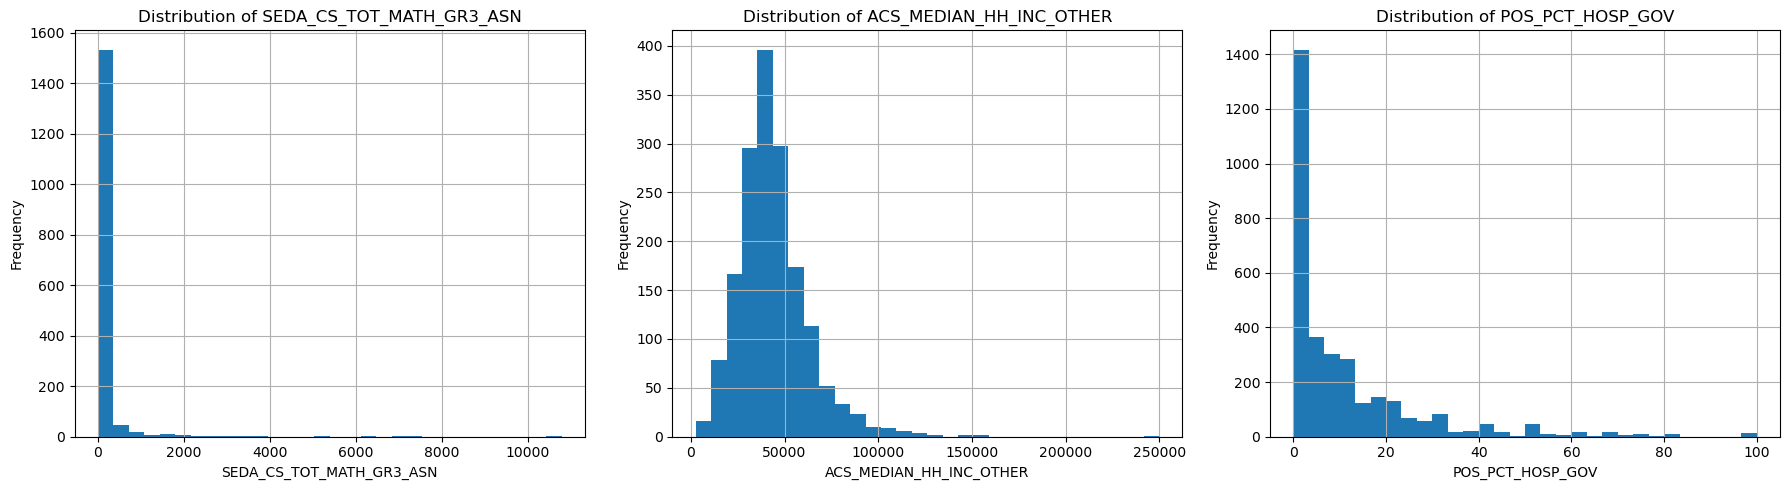

,SEDA_CS_TOT_MATH_GR3_ASN,ACS_MEDIAN_HH_INC_OTHER,POS_PCT_HOSP_GOV
count,1631.000000,1681.000000,3225.000000
mean,109.787247,44075.870315,10.746471
std,519.022432,19596.471210,15.705649
min,1.000000,2499.000000,0.000000
25%,3.000000,31842.000000,0.000000
50%,7.000000,41697.000000,5.000000
75%,32.000000,52426.000000,14.290000
max,10783.000000,250001.000000,100.000000


In [13]:
# Select a representative sample of columns to analyze
sample_columns = ['SEDA_CS_TOT_MATH_GR3_ASN', 'ACS_MEDIAN_HH_INC_OTHER', 'POS_PCT_HOSP_GOV']

# Generate descriptive statistics for the selected columns
descriptive_stats = sdoh_2017_cleaned[sample_columns].describe()

# Plot histograms for the selected columns to visualize their distributions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
for ax, column in zip(axes, sample_columns):
    sdoh_2017_cleaned[column].dropna().hist(ax=ax, bins=30)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

descriptive_stats

1. SEDA_CS_TOT_MATH_GR3_ASN (Total Math Grade 3, Asian Students):
    Highly right-skewed distribution with a significant range.
    Contains extreme values, suggesting outliers or very uneven distribution.
    Mean is significantly higher than the median, reflecting the skew.

2. ACS_MEDIAN_HH_INC_OTHER (Median Household Income, Other):
    Right-skewed distribution, typical for income data.
    Variability is moderate, with a range from very low to very high values.

3. POS_PCT_HOSP_GOV (Percentage of Hospitals Governed by Government):
    A mix of many zeros and some higher values, possibly bimodal.
    Right-skewed due to many counties with no government hospitals and a few with a high percentage.

In [14]:
from scipy.stats import mode

# Median imputation for 'SEDA_CS_TOT_MATH_GR3_ASN' and 'ACS_MEDIAN_HH_INC_OTHER'
median_values = {
    'SEDA_CS_TOT_MATH_GR3_ASN': sdoh_2017_cleaned['SEDA_CS_TOT_MATH_GR3_ASN'].median(),
    'ACS_MEDIAN_HH_INC_OTHER': sdoh_2017_cleaned['ACS_MEDIAN_HH_INC_OTHER'].median()
}
sdoh_2017_cleaned['SEDA_CS_TOT_MATH_GR3_ASN'].fillna(median_values['SEDA_CS_TOT_MATH_GR3_ASN'], inplace=True)
sdoh_2017_cleaned['ACS_MEDIAN_HH_INC_OTHER'].fillna(median_values['ACS_MEDIAN_HH_INC_OTHER'], inplace=True)

# Mode imputation for 'POS_PCT_HOSP_GOV'
mode_value = mode(sdoh_2017_cleaned['POS_PCT_HOSP_GOV'].dropna())[0][0]
sdoh_2017_cleaned['POS_PCT_HOSP_GOV'].fillna(mode_value, inplace=True)

# Confirm imputation by checking if there are any missing values left in these columns
imputation_check = {
    'SEDA_CS_TOT_MATH_GR3_ASN': sdoh_2017_cleaned['SEDA_CS_TOT_MATH_GR3_ASN'].isnull().sum(),
    'ACS_MEDIAN_HH_INC_OTHER': sdoh_2017_cleaned['ACS_MEDIAN_HH_INC_OTHER'].isnull().sum(),
    'POS_PCT_HOSP_GOV': sdoh_2017_cleaned['POS_PCT_HOSP_GOV'].isnull().sum()
}
imputation_check


{'SEDA_CS_TOT_MATH_GR3_ASN': 0,
 'ACS_MEDIAN_HH_INC_OTHER': 0,
 'POS_PCT_HOSP_GOV': 0}

In [15]:
# Check for any remaining missing values in the entire cleaned dataset
total_missing_values = sdoh_2017_cleaned.isnull().sum().sum()

# Check if there are any missing values
total_missing_values


116279

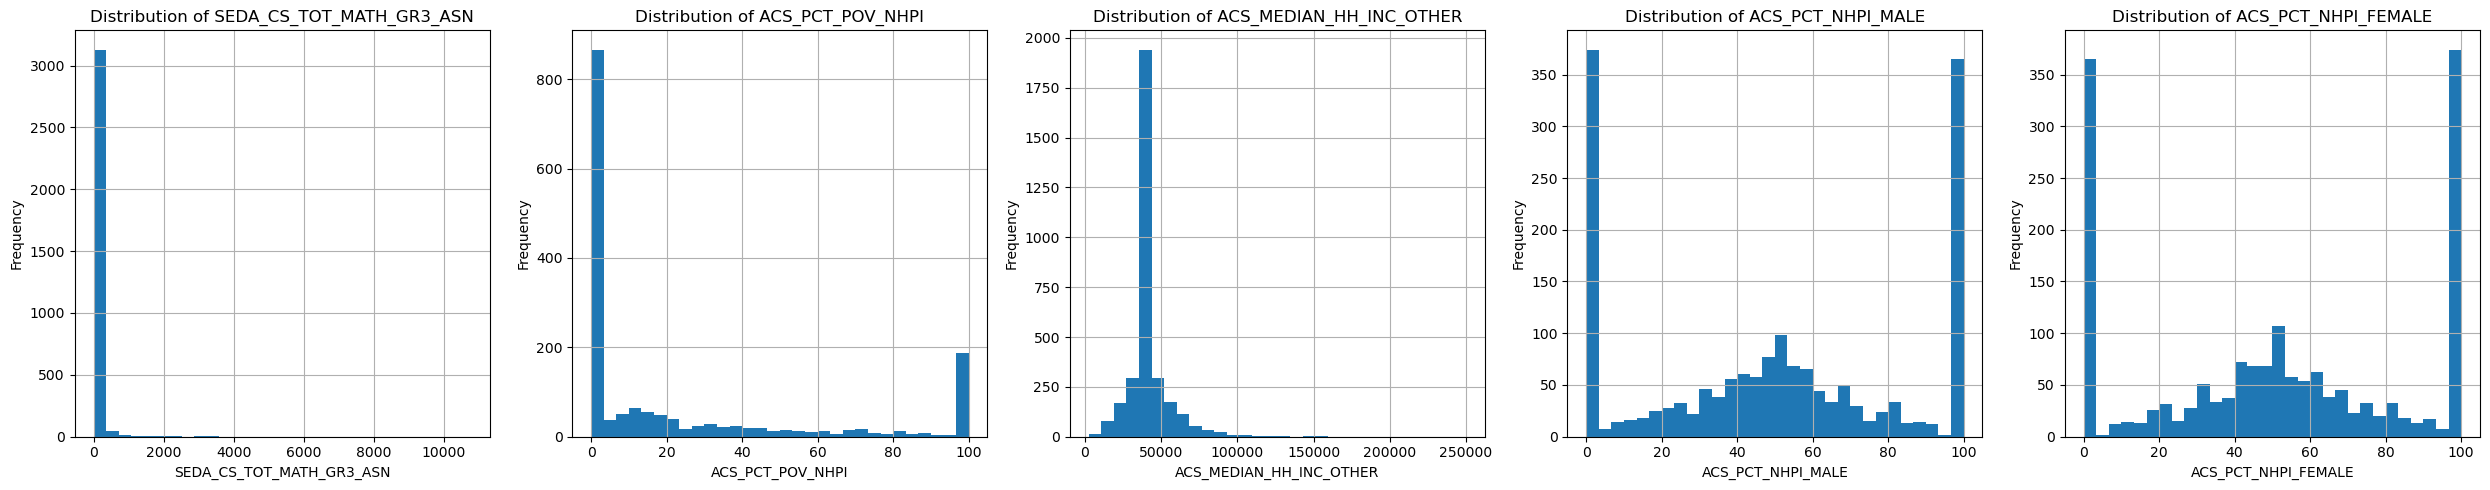

,SEDA_CS_TOT_MATH_GR3_ASN,ACS_PCT_POV_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_FEMALE
count,3226.000000,1653.000000,3226.000000,1740.000000,1740.000000
mean,58.967142,23.162341,42936.578735,49.261718,50.738310
std,372.552966,34.439949,14193.702287,35.730671,35.730668
min,1.000000,0.000000,2499.000000,0.000000,0.000000
25%,7.000000,0.000000,41135.000000,17.022500,20.000000
50%,7.000000,0.000000,41697.000000,49.860000,50.140000
75%,7.000000,35.060000,42245.500000,80.000000,82.977500
max,10783.000000,100.000000,250001.000000,100.000000,100.000000


In [16]:
# Select a sample of numerical columns with missing values for detailed analysis
sample_numerical_columns = numerical_columns_with_missing.index[:5]  # Take the top 5 with missing values for analysis

# Generate descriptive statistics and plot distributions for these columns
descriptive_stats_sample = sdoh_2017_cleaned[sample_numerical_columns].describe()

# Plot histograms for the sample columns to visualize their distributions
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
for ax, column in zip(axes, sample_numerical_columns):
    sdoh_2017_cleaned[column].dropna().hist(ax=ax, bins=30)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

descriptive_stats_sample


In [17]:
# Apply median imputation to the selected sample columns
for column in sample_numerical_columns:
    median_value = sdoh_2017_cleaned[column].median()
    sdoh_2017_cleaned[column].fillna(median_value, inplace=True)

# Check if there are any remaining missing values in these sample columns
sample_missing_check = {col: sdoh_2017_cleaned[col].isnull().sum() for col in sample_numerical_columns}
sample_missing_check


{'SEDA_CS_TOT_MATH_GR3_ASN': 0,
 'ACS_PCT_POV_NHPI': 0,
 'ACS_MEDIAN_HH_INC_OTHER': 0,
 'ACS_PCT_NHPI_MALE': 0,
 'ACS_PCT_NHPI_FEMALE': 0}

In [18]:
# Apply median imputation to the rest of the numerical columns with missing values
remaining_numerical_columns_with_missing = numerical_columns_with_missing.index.drop(sample_numerical_columns)

for column in remaining_numerical_columns_with_missing:
    median_value = sdoh_2017_cleaned[column].median()
    sdoh_2017_cleaned[column].fillna(median_value, inplace=True)

# Check if there are any remaining missing values in the dataset
total_missing_after_imputation = sdoh_2017_cleaned.isnull().sum().sum()
total_missing_after_imputation


84

In [19]:
# Check again for any remaining missing values in the entire cleaned dataset
final_missing_values_check = sdoh_2017_cleaned.isnull().sum().sum()

# Check for columns that may be related to "race"
race_related_columns = [col for col in sdoh_2017_cleaned.columns if 'race' in col.lower() or 'ethnic' in col.lower()]

final_missing_values_check, race_related_columns


(84,
 ['ACS_PCT_MULT_RACE',
  'ACS_PCT_MULT_RACE_FEMALE',
  'ACS_PCT_MULT_RACE_MALE',
  'ACS_PCT_MULT_RACE_NONHISP',
  'ACS_PCT_OTHER_RACE'])

In [20]:
# Check for columns with missing values and their count
columns_with_missing_values = sdoh_2017_cleaned.isnull().sum()
columns_with_missing_values = columns_with_missing_values[columns_with_missing_values > 0]
columns_with_missing_values


REGION    84
dtype: int64

In [25]:
# Group the data by 'STATE' and fill missing 'REGION' values with the mode of the group
sdoh_2017_cleaned['REGION'] = sdoh_2017_cleaned.groupby('STATE')['REGION'].transform(lambda x: x.fillna(mode(x)[0][0] if len(x.dropna()) > 0 else np.nan))

# Check if there are any missing values in 'REGION' after imputation
missing_values_region_after_imputation = sdoh_2017_cleaned['REGION'].isnull().sum() 
missing_values_region_after_imputation

84

In [26]:
# Define a custom function to safely apply mode imputation
def safe_mode_impute(x):
    if not x.mode().empty:
        return x.fillna(x.mode().iloc[0])
    else:
        return x  # Returns the original series if mode calculation is not possible

# Group the data by 'STATE' and fill missing 'REGION' values using the safe mode function
sdoh_2017_cleaned['REGION'] = sdoh_2017_cleaned.groupby('STATE')['REGION'].transform(safe_mode_impute)

# Verify that there are no more missing values in the 'REGION' column
missing_values_after_safe_mode_imputation = sdoh_2017_cleaned['REGION'].isnull().sum()
print("Missing values in 'REGION' after safe mode-based imputation:", missing_values_after_safe_mode_imputation)


Missing values in 'REGION' after safe mode-based imputation: 84


In [27]:
# Check if the mode of the entire 'REGION' column is available to use as a fallback
overall_mode = sdoh_2017_cleaned['REGION'].mode()

if not overall_mode.empty:
    # Impute missing values using the overall mode
    sdoh_2017_cleaned['REGION'].fillna(overall_mode.iloc[0], inplace=True)
    # Verify that there are no more missing values
    missing_values_after_overall_mode = sdoh_2017_cleaned['REGION'].isnull().sum()
    print("Missing values in 'REGION' after overall mode imputation:", missing_values_after_overall_mode)
else:
    print("No available mode to use for imputation.")


Missing values in 'REGION' after overall mode imputation: 0


In [36]:
# Drop 'STATE', 'COUNTY' columns
sdoh_2017_cleaned = sdoh_2017_cleaned.drop(columns=['STATE', 'COUNTY'], axis=1)

In [37]:
sdoh_2017_cleaned.head()

,YEAR,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,...,POS_HOSP_PSYCH_RATE,POS_TOT_HOSP_AMBULANCE,POS_HOSP_AMBULANCE_RATE,POS_TOT_HOSP_CHEMO,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV
0,2017,South,0,55036.0,54293.0,51898.0,44109.0,42974.0,2746.0,36757.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.02,50.00,38.89,11.11
1,2017,South,0,203360.0,201089.0,191854.0,166364.0,163759.0,10031.0,143022.0,...,0.0,0.0,0.00,0.0,0.00,3.0,0.01,63.49,36.51,0.00
2,2017,South,0,26201.0,25925.0,24765.0,21627.0,21241.0,1071.0,18434.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.04,73.33,20.00,6.67
3,2017,South,0,22580.0,22224.0,21301.0,18743.0,18415.0,1137.0,15859.0,...,0.0,1.0,0.04,1.0,0.04,1.0,0.04,27.27,45.45,27.27
4,2017,South,0,57667.0,57088.0,54171.0,46501.0,45924.0,3224.0,39475.0,...,0.0,0.0,0.00,0.0,0.00,1.0,0.02,60.00,40.00,0.00


In [39]:
# Export DF to csv

sdoh_2017_cleaned.to_csv('sdoh_FINAL.csv', index=False)